## Decision Tree in Scikit Learn



In [3]:
import numpy as np
from sklearn import datasets
import  matplotlib.pyplot as plt

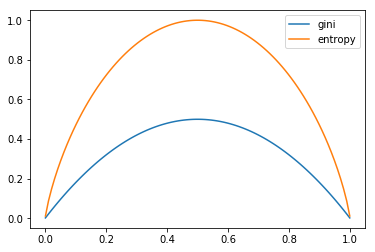

In [4]:

import math
x = np.linspace(start=.001, stop=.999, num=100)  # math.log won't accept 0 or 1
y1 = list(map(lambda i: 2 * i * (1 - i), x))
y2 = list(map(lambda t: -t * math.log(t, 2) - (1 - t) * math.log((1 - t), 2), x))

plt.plot(x, y1, label='gini')
plt.plot(x, y2, label='entropy')
plt.legend(loc=1)
plt.show()

In [5]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

### Arguments:

- **criterion**: "gini" or "entropy", corresponding to the criteria of "gini impurity" and "information gain". default = 'gini'.

- **max_depth**: The maximum depth of the tree. default = None, which means the nodes will be expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- **min_samples_split**: The minimum number of samples required to split. default = 2.

- **min_samples_leaf **: The minimum number of samples required to be at a terminate node. default = 1.

### Methods:

- **fit**: Build a decision tree from the training set (X, y).

- **predict**: 	Predict class or regression value for X.

- **predict_log_proba**	Predict class log-probabilities of the input samples X.

- **predict_proba**	Predict class probabilities of the input samples X.

- **score**:	Return the mean accuracy on the given test data and labels.

- **set_params**:	Set the parameters of this estimator.

- **get_params**: Get parameters for this estimator.

### Attributes:

- **tree\_**: Tree object, the underlying tree object.

- **feature\_importances\_**: The feature importances. The higher, the more important the feature. Also known as gini importance.

<p><a name="2case1"></a></p>
### Case 1: Iris Data

We use all the observations and the last two features, "petal length" and "petal width", in the iris data to build a decision-tree.

In [7]:
from sklearn import datasets
iris = datasets.load_iris()
tree_model.fit(iris.data[:, 2:4], iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [8]:
## We can see that the performance of decision tree is amazingly good!
tree_model.score(iris.data[:, 2:4], iris.target)

0.99333333333333329

In [9]:
print(tree_model.    cx )

[ 0.06492158  0.93507842]


In [11]:
def plot_model(model, x, y, label):
    '''
    model: a fitted model
    x, y: two variables, should arrays
    label: true label
    '''
    margin = 0.5
    x_min = x.min() - margin
    x_max = x.max() + margin
    y_min = y.min() - margin
    y_max = y.max() + margin
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    col_dict = {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
        'blue': [(0, 1, 0.5), (1, 1, 1)]
    }
    cmap = colors.LinearSegmentedColormap('red_blue_classes', col_dict)
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, nx),
        np.linspace(y_min, y_max, ny)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes')
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters and true labels
    plt.scatter(x, y, c=label, edgecolors='k')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    ## if it's a SVM model
    if hasattr(model, 'support_'):
        # if it's a SVC, plot the support vectors
        index = model.support_
        plt.scatter(x[index], y[index], c=label[index], s=200, alpha=0.33, edgecolors='k')

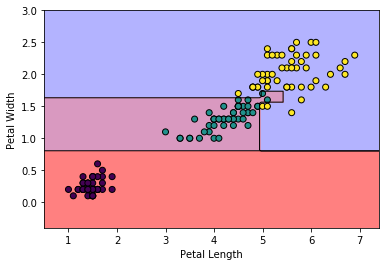

In [12]:
plot_model(tree_model, iris.data[:, 2], iris.data[:, 3], iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

<p><a name="rf"></a></p>
## Random Forest in Scikit Learn

### Bagging

By averaging a collection of bootstrap (repeated) samples from the training data set, we can dramatically reduce the variance of trees, leading to improved prediction, this is called bagging.

- generate B bootstrapped training dataset.

- for each test observation, we record the class predicted by each of the B trees, and choose the majority

- the overall prediction is the most commonly occurring class among the B predictions.



The function **ensemble.RandomForestClassifier** in library sklean can be used to implement random forest.

In [13]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()

### Arguments

Since random forest is combined by decision trees, it also has the arguments of tree: 

- **criterion** : default=”gini”.
- **max_depth**: default = None.
- **min_samples_split**: default = 2.
- **min_samples_leaf**: default = 1.
- **n_estimators**: The number of trees. default=100.
- **bootstrap**: Whether bootstrap samples are used when building trees. default=true.
- **oob_score**: Whether to use out-of-bag samples to estimate the generalization error. default=false.

### Methods

- **fit**: Build a forest of trees from the training set (X, y).
- **score**: Return the mean accuracy on the given test data and labels.
- **predict**: Predict class for X.
- **predict_log_proba**: Predict class log-probabilities for X.
- **predict_proba**: Predict class probabilities for X.
- **set_params**: Set the parameters of this estimator.
- **get_params**: Get parameters for this estimator.

### Attributes

- **feature\_importances\_**:The feature importances (the higher, the more important the feature).

- **oob\_score\_**: Score of the training dataset obtained using an out-of-bag estimate.

<p><a name="3case1"></a></p>
### Case 1: Iris Data

We use all the observations and the last two features, "petal length" and "petal width", in the iris data to build a decision-tree.

In [15]:
randomForest.set_params(random_state=42)
randomForest.fit(iris.data[:, 2:4], iris.target) # fit 
randomForest.score(iris.data[:, 2:4], iris.target) # accuracy

0.98666666666666669

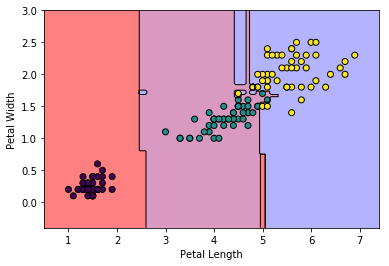

In [16]:
plot_model(randomForest, iris.data[:, 2], iris.data[:, 3], iris.target)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

### Feature Importance

- We then sort the features by importance:

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [22]:
x,y=iris.data,iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=123)

In [36]:
rnd_clf = randomForest.set_params(n_estimators=50, random_state=42)
rnd_clf.fit(x_train, y_train)
print("The training error of random forest is: %.5f" %(1 - rnd_clf.score(x_train, y_train)))
print("The test     error of random forest is: %.5f" %(1 - rnd_clf.score(x_test, y_test)))

The training error of random forest is: 0.00000
The test     error of random forest is: 0.06667


In [37]:
for name, importance in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, "=", importance)

('sepal length (cm)', '=', 0.098017227317868244)
('sepal width (cm)', '=', 0.036174259541753136)
('petal length (cm)', '=', 0.43793549758318467)
('petal width (cm)', '=', 0.42787301555719404)


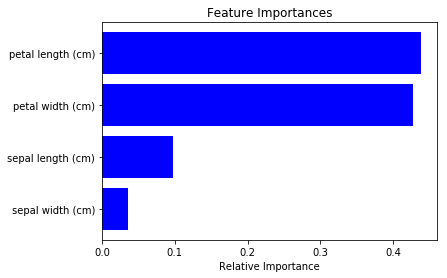

In [38]:
features = iris['feature_names']
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### OOB-Score

- oob-score is the *out of bag* score, which is also used to evaluate the model.
- After fitting on the bootstrap sample, it make predictions on the rest of the data set(out of the bootstrap sample).
- We can not control the numbers of observations in the out of bag sample.

We need to set *oob-score=true* manually when fit the model:

In [39]:
rnd_clf.set_params(oob_score=True, random_state=42)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

In [40]:
randomForest.oob_score_

0.94999999999999996

<p><a name="kmeans"></a></p>
## K-means in Scikit Learn
Import the class *KMeans* from the module *cluster* in the sklearn library.

In [43]:
from __future__ import print_function
from sklearn.cluster import KMeans
kmeans = KMeans()

**Arguments:**

- **n_clusters**: The number of clusters to divide, default is 8.
- **max_iter**: The maximal number of iterations, default is 300.
- **n_init**: Number of time the k-means algorithm will run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. default is 10.
- **init**: Method for initialization, defaults to 'k-means++'. Other options are 'random' or an ndarray of shape (n_clusters, n_features) and gives the initial centers.
- **random_state**: Optional. The generator used to initialize the centers. If an integer is given, it fixes the seed. Defaults to the global numpy random number generator.

Usually, we just need to set the argument **n_clusters** to determine how many groups are we going to split.

**Attributes:**

- **cluster\_centers\_**: The coordinates of cluster centers.

- **labels_**: Labels of each observation, which indicate the group number of each observation.

- **inertia_**: Sum of distances of samples to their closest cluster center.

The most import attribute here is the **labels_** .

**Methods:**

- **fit**: Fit k-means clustering on a given data set.
- **fit_predict**: Compute cluster centers and predict cluster index for each sample.
- **get_params**: Get parameters for this estimator.
- **set_params**: Set the parameters of this estimator.
- **predict**: Given a set of data, predict the closest cluster each sample belongs to.

In [44]:
from matplotlib import cm
from sklearn.metrics import silhouette_samples

def plot_silhouette(km, X):
    y_km = kmeans.fit_predict(x)
    cluster_labels = np.unique(y_km)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        # Aggregate the silhouette scores for samples belonging to
        # cluster c, and sort them
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()

        size_cluster_c = len(c_silhouette_vals)
        y_ax_upper += size_cluster_c
        color = cm.jet(i*1.0/n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, color=color)

        # Compute the new y_ax_lower for next plot
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += size_cluster_c

    # The vertical line for average silhouette score of all the values
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='red', linestyle='--')

    plt.yticks(yticks, cluster_labels + 1)
    plt.title('Silhouette Analysis')
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

<p><a name="kcase2"></a></p>


In this case, we try to split the iris data into multiple groups by using the features *sepal length*, *sepal width*, *petal length*, *petal width*.

- Set the argument *n_clusters* to 3.
- Fit the iris data.

In [45]:
from sklearn import datasets
iris = datasets.load_iris()
kmeans.set_params(n_clusters=3)
kmeans.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

- The centroid of each cluster:

In [46]:
kmeans.cluster_centers_

array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

- The label of each observation.

In [47]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

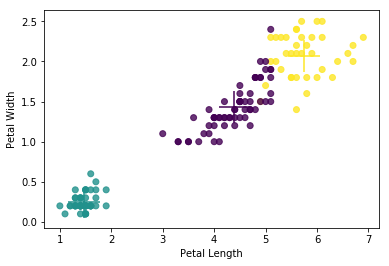

In [48]:
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=kmeans.labels_, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], marker="+", s=1000, c=[0, 1, 2])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

The big markers "+" refers to the centroid of each cluster. 

We can also fit the principal components to the KMeans algorithm. Perform K means on the new dataset below, and then find the centers and the labels.

- Plot the elbow method. What is the optimal number of clusters?

In [50]:
def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in n_cluster_range:
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    plt.plot(n_cluster_range, inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

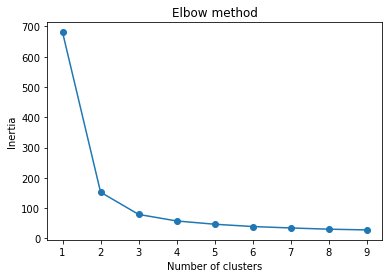

In [52]:
#### Your code here
plot_inertia(kmeans, iris.data, range(1, 10))

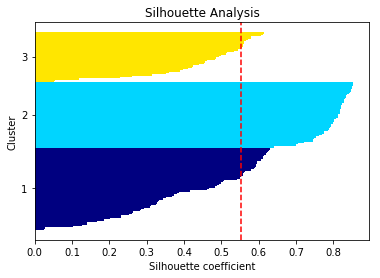

In [55]:
### Your code here
kmeans.set_params(n_clusters=3)
plot_silhouette(kmeans, iris.data)

<p><a name="swkmeans"></a></p>
### Strengths and Weaknesses of K-means

- Strengths

    - Use simple principles for identifying clusters which can be explained in non-statistical terms.
    - It is fairly efficient and performs well at dividing the data into useful clusters.
    
- Weaknesses

    - It is less sophisticated than more recent clustering algorithms.
    - Because it uses initial random choice, it is not guaranteed to find the optimal set of clusters.
    - Require a reasonable guess for how many clusters naturally exist in the data.

<p><a name="hier"></a></p>
## Hierarchical Clustering

In [56]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()

**Arguments:**

- **n_clusters**: The number of clusters to find. default=2 

- **affinity**: Metric used to compute the linkage. Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”. If linkage is “ward”, only “euclidean” is accepted. default: “euclidean”

- **linkage**: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    - *ward* minimizes the variance of the clusters being merged.
    - *average* uses the average of the distances of each observation of the two sets.
    - *complete* or maximum linkage uses the maximum distances between all observations of the two sets.

**Arguments:**

- The possible values of the **affinity** are “euclidean”, “l1”, “l2”, “manhattan”, “cosine”.

- "l1" is the same as "manhattan", while "l2" is the same as "euclidean".

- "cosine" here in python is not the same as we told previously.


The smaller the euclidean/manhattan distance is, the closer the two observations are.  The smaller the cosine is, the more far the observations are.

So in Python, the cosine distance is redefined as :
$$1 - \frac{\sum_{i=1}^{n} x_{1i} \times x_{2i}} {\sqrt{ \parallel x_1 \parallel ^2} \times \sqrt{ \parallel x_2 \parallel ^2}}$$

Now the cosine distance ranges from 0 to 2, and the smaller it is, the closer the observations are.

- 0: two vectors point to the same direction
- 1: perpendicular
- 2: opposite direction

<p><a name="distance"></a></p>
### Distance in Scikit Learn
We can compute the different distances by using the function **pairwise_distances**.

In [57]:
import numpy as np
a = np.array([[1, 2], [2, 1]])

<p><a name="manh"></a></p>
#### Manhattan Distance

In [58]:
from sklearn.metrics.pairwise import pairwise_distances
pairwise_distances(a, metric='l1') 
# abs(1-2) + abs(2-1)  = 2

array([[ 0.,  2.],
       [ 2.,  0.]])

<p><a name="euclidean"></a></p>
#### Euclidean Distance

In [59]:
pairwise_distances(a, metric='l2') 
# ((1-2)**2 + (2-1) ** 2) ** 0.5 = 1.4142

array([[ 0.        ,  1.41421356],
       [ 1.41421356,  0.        ]])

<p><a name="cosine"></a></p>
#### Cosine Distance

In [60]:
pairwise_distances(a, metric='cosine') 
# 1 - (1*2 + 2*1)/(5**0.5 * 5**0.5) = 0.2

array([[ 0. ,  0.2],
       [ 0.2,  0. ]])

**Attributes:**

- **labels_**: Cluster labels for each observation.
- **n\_leaves\_**: Number of leaves in the hierarchical tree, which is also the number of observations.

**Methods:**

- **fit**: Fit the hierarchical clustering on the data.
- **get_params**: Get parameters for this estimator.
- **set_params**: Set the parameters of this estimator.

In [61]:
from sklearn import datasets
iris = datasets.load_iris()
hier.set_params(n_clusters=3)
hier.fit(iris.data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x108172140>)

In [62]:
hier.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

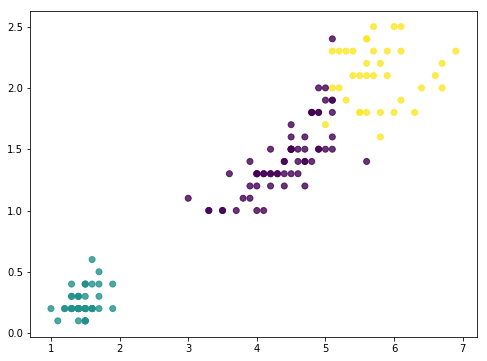

In [63]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 8, 6
plt.scatter(iris.data[:, 2], iris.data[:, 3], c=hier.labels_, alpha=0.8)
plt.show()

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

def linkage_frame(data):
    row_clusters = linkage(data, method='complete', metric='euclidean')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df

In [65]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [66]:
linkage_df = linkage_frame(iris_df.values)
linkage_df.head()

,row label 1,row label 2,distance,no. items in clust.
cluster 1,9.0,34.0,0.0,2.0
cluster 2,37.0,150.0,0.0,3.0
cluster 3,101.0,142.0,0.0,2.0
cluster 4,7.0,39.0,0.1,2.0
cluster 5,0.0,17.0,0.1,2.0


- dendrogram?

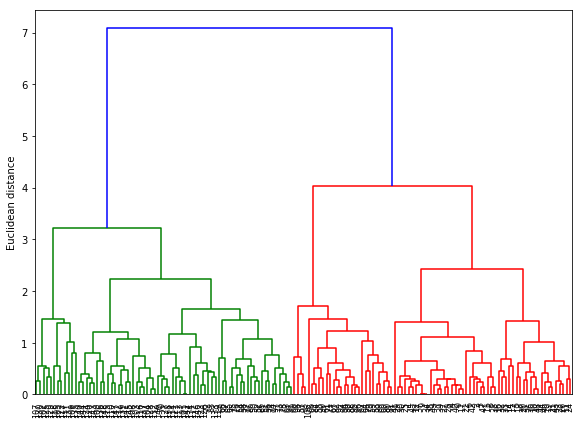

In [67]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()